# Customer Segmentation / Clustering

### Import Required Libraries

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

### Load and Prepare the Data

In [4]:
# Load datasets
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

# Aggregate transaction-level data for each customer
customer_features = transactions.groupby("CustomerID").agg(
    total_spending=("TotalValue", "sum"),
    total_quantity=("Quantity", "sum"),
    num_transactions=("TransactionID", "count")
).reset_index()

# Merge with customer profile data
customer_features = customer_features.merge(
    customers[["CustomerID", "Region"]],
    on="CustomerID",
    how="left"
)

# One-hot encode the 'Region' column
customer_features = pd.get_dummies(customer_features, columns=["Region"], drop_first=True)

# Drop CustomerID for clustering purposes
customer_ids = customer_features["CustomerID"]
customer_features = customer_features.drop(columns=["CustomerID"])

In [5]:
# Normalize the Data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features)


### Apply Clustering Algorithm

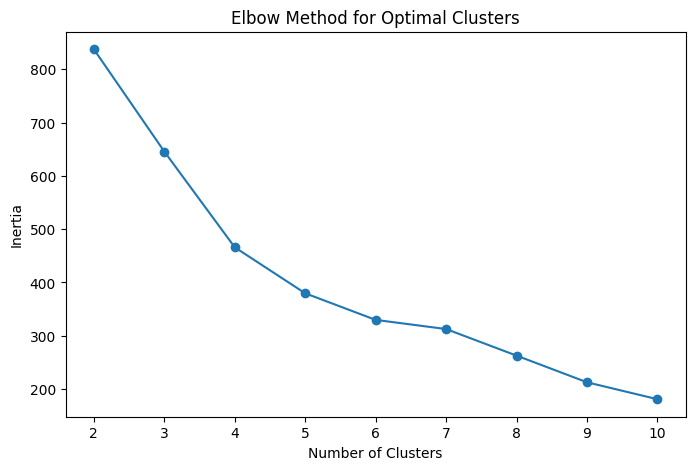

In [6]:
# Elbow method to determine optimal clusters
inertia = []
range_clusters = range(2, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Clusters")
plt.show()

#### Perform Clustering

In [7]:
# Fit KMeans with the chosen number of clusters (e.g., 4)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the original DataFrame
customer_features["Cluster"] = clusters


#### Calculate Clustering Metrics

In [8]:
db_index = davies_bouldin_score(scaled_features, clusters)
silhouette_avg = silhouette_score(scaled_features, clusters)

print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette_avg}")

Davies-Bouldin Index: 0.9880667545355788
Silhouette Score: 0.3963774629731389


#### Visualize the Clusters

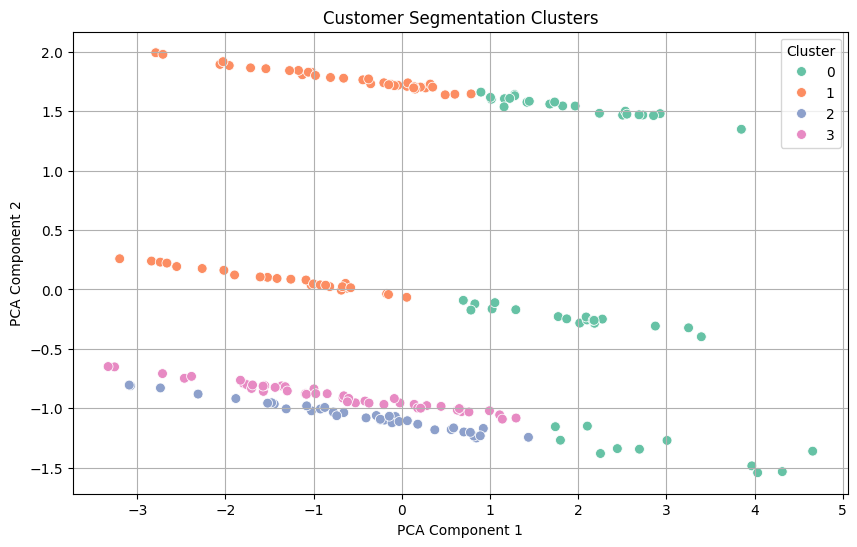

In [12]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=reduced_features[:, 0],
    y=reduced_features[:, 1],
    hue=clusters,
    palette="Set2",
    s=50
)
plt.title("Customer Segmentation Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster", loc="upper right")
plt.grid(True)
plt.show()